In [184]:
!pip install prince==0.12.1

  Using cached prince-0.12.1-py3-none-any.whl.metadata (638 bytes)
Using cached prince-0.12.1-py3-none-any.whl (415 kB)
  Attempting uninstall: prince
    Found existing installation: prince 0.11.0
    Uninstalling prince-0.11.0:
      Successfully uninstalled prince-0.11.0


In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, MultiLabelBinarizer
import prince
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.precision', 2)

In [232]:
pd.set_option('display.float_format', '{:.5f}'.format)

In [265]:
#Cargar el archivo
df = pd.read_csv("C:/Users/Mildred/Downloads/movies_FINAL (3).csv")
print(df.head()) #La columna color no aporta información relevante, ya que se repite a lo largo del Dataframe

       director_name  num_critic_for_reviews  duration  \
0      James Cameron               723.00000 178.00000   
1     Gore Verbinski               302.00000 169.00000   
2         Sam Mendes               602.00000 148.00000   
3  Christopher Nolan               813.00000 164.00000   
4        Doug Walker                     NaN       NaN   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                  0.00000               855.00000  Joel David Moore   
1                563.00000              1000.00000     Orlando Bloom   
2                  0.00000               161.00000      Rory Kinnear   
3              22000.00000             23000.00000    Christian Bale   
4                131.00000                     NaN        Rob Walker   

   actor_1_facebook_likes                           genres     actor_1_name  \
0              1000.00000  Action|Adventure|Fantasy|Sci-Fi      CCH Pounder   
1             40000.00000         Action|Adventure|Fantasy  

###**PREPROCESAMIENTO**

In [266]:
#Tamaño del dataframe
df.shape

(4998, 27)

In [267]:
#Observar las columnas
df.columns

Index(['director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'genres', 'actor_1_name', 'movie_title',
       'num_voted_users', 'cast_total_facebook_likes', 'actor_3_name',
       'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link',
       'num_user_for_reviews', 'language', 'country', 'content_rating',
       'title_year', 'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio',
       'movie_facebook_likes', 'budget_filled', 'gross_filled'],
      dtype='object')

In [268]:
df.shape

(4998, 27)

In [269]:
df.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,genres,actor_1_name,movie_title,...,language,country,content_rating,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,budget_filled,gross_filled
0,James Cameron,723.00000,178.00000,0.00000,855.00000,Joel David Moore,1000.00000,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,...,English,USA,PG-13,2009.00000,936.00000,7.90000,1.78000,33000.00000,237000000.00000,760505847.00000
1,Gore Verbinski,302.00000,169.00000,563.00000,1000.00000,Orlando Bloom,40000.00000,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,...,English,USA,PG-13,2007.00000,5000.00000,7.10000,2.35000,0.00000,300000000.00000,309404152.00000
2,Sam Mendes,602.00000,148.00000,0.00000,161.00000,Rory Kinnear,11000.00000,Action|Adventure|Thriller,Christoph Waltz,Spectre,...,English,UK,PG-13,2015.00000,393.00000,6.80000,2.35000,85000.00000,245000000.00000,200074175.00000
3,Christopher Nolan,813.00000,164.00000,22000.00000,23000.00000,Christian Bale,27000.00000,Action|Thriller,Tom Hardy,The Dark Knight Rises,...,English,USA,PG-13,2012.00000,23000.00000,8.50000,2.35000,164000.00000,250000000.00000,448130642.00000
4,Doug Walker,NaN,NaN,131.00000,NaN,Rob Walker,131.00000,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,...,NaN,NaN,NaN,NaN,12.00000,7.10000,NaN,0.00000,245000000.00000,2068223624.00000


In [270]:
#generar variable de salida
df["imdb_category"] = np.where(
    df["imdb_score"] < 6, "Not Good",
    np.where(df["imdb_score"] < 7, "Neutral", "Good")
)

df = df.drop(columns = "imdb_score")

In [271]:
#Analizar la distribución de las variables numéricas
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes,budget_filled,gross_filled
count,4949.00000,4983.00000,4895.00000,4975.00000,4991.00000,4997.00000,4997.00000,4985.00000,4976.00000,4890.00000,4984.00000,4670.00000,4997.00000,4750.00000,4515.00000
mean,139.89008,107.21333,688.67906,639.90090,6556.93989,83486.87613,9678.65539,1.36891,272.06773,2002.46687,1643.30879,2.21847,7488.84371,38782601.25916,47326360.16966
std,121.47759,25.24878,2821.64962,1643.29828,15061.58670,138095.34525,18166.81818,2.01462,377.79563,12.47577,4031.27032,1.37664,19292.39822,201868859.21318,76804781.10921
min,1.00000,7.00000,0.00000,0.00000,0.00000,5.00000,0.00000,0.00000,1.00000,1916.00000,0.00000,1.18000,0.00000,10.00000,13.00000
25%,50.00000,93.00000,7.00000,133.00000,611.50000,8560.00000,1407.00000,0.00000,64.75000,1999.00000,280.00000,1.85000,0.00000,6000000.00000,4938524.00000
50%,110.00000,103.00000,49.00000,369.00000,984.00000,34263.00000,3086.00000,1.00000,156.00000,2005.00000,595.00000,2.35000,162.00000,19000000.00000,23225911.00000
75%,195.00000,118.00000,192.00000,635.00000,11000.00000,96129.00000,13748.00000,2.00000,324.00000,2011.00000,917.25000,2.35000,3000.00000,42000000.00000,58976802.50000
max,813.00000,511.00000,23000.00000,23000.00000,640000.00000,1689764.00000,656730.00000,43.00000,5060.00000,2016.00000,137000.00000,16.00000,349000.00000,12215500000.00000,2068223624.00000


In [272]:
#Visualizar el tipo de dato por columna
df.dtypes

director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users              float64
cast_total_facebook_likes    float64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
title_year                   float64
actor_2_facebook_likes       float64
aspect_ratio                 float64
movie_facebook_likes         float64
budget_filled                float64
gross_filled                 float64
imdb_category                 object
d

In [273]:
#Analizar varoles nulos
print(df.isnull().sum())
cantidad_nulos = df.isnull().sum().sum()
print("\nTotal de filas con datos nulos:", cantidad_nulos)

director_name                103
num_critic_for_reviews        49
duration                      15
director_facebook_likes      103
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                1
cast_total_facebook_likes      1
actor_3_name                  24
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                1
num_user_for_reviews          22
language                      15
country                        6
content_rating               301
title_year                   108
actor_2_facebook_likes        14
aspect_ratio                 328
movie_facebook_likes           1
budget_filled                248
gross_filled                 483
imdb_category                  0
dtype: int64

Total de filas con datos nulos: 2039


VARIABLE: **content_rating**

In [274]:
#Para el content_rating, se imputará con "Unrated" en lugar de la moda para ser más precisos
print(df['content_rating'].unique())
df['content_rating'] = df['content_rating'].fillna('Unrated')
df['content_rating'].replace(to_replace="Not Rated", value = "Unrated", inplace = True)

print(df['content_rating'].unique())
print("Cantidad de nulos: ", df["content_rating"].isnull().sum())

['PG-13' nan 'PG' 'G' 'R' 'TV-14' 'TV-PG' 'TV-MA' 'TV-G' 'Not Rated'
 'Unrated' 'Approved' 'TV-Y' 'NC-17' 'X' 'TV-Y7' 'GP' 'Passed' 'M']
['PG-13' 'Unrated' 'PG' 'G' 'R' 'TV-14' 'TV-PG' 'TV-MA' 'TV-G' 'Approved'
 'TV-Y' 'NC-17' 'X' 'TV-Y7' 'GP' 'Passed' 'M']
Cantidad de nulos:  0


In [275]:
#Debido a que son varias categorías, se agruparán de acuerdo al público objetivo de esas películas
condiciones = [
    df["content_rating"].isin(["G", "PG", "TV-G", "TV-PG", "GP", "Approved", "Passed"]),
    df["content_rating"].isin(["PG-13", "TV-14"]),
    df["content_rating"].isin(["R", "NC-17", "X", "M", "TV-MA"]),
    df["content_rating"].isin(["Unrated"])
]

# Cateogorías a asignar
categorias = ["Family", "Teen", "Adult", "Unrated"]

# Crear columna agrupada
df["CR_grouped"] = np.select(condiciones, categorias, default = "Other")
df.drop(columns = "content_rating", inplace = True)

# Verificar
print(df["CR_grouped"].unique())

['Teen' 'Unrated' 'Family' 'Adult' 'Other']


VARIABLE: **género**

In [276]:
#La variable género contiene los diferentes géneros de una película separado por split |, así que se tratará con Multilabel
mlb = MultiLabelBinarizer()
df['genres_list'] = df['genres'].str.split('|')
genres_dummies = pd.DataFrame(mlb.fit_transform(df["genres_list"]),
                              columns=mlb.classes_,
                              index=df.index)

df = pd.concat([df.drop(columns=["genres", "genres_list"]), genres_dummies], axis=1)

In [277]:
df.columns

Index(['director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'actor_1_name', 'movie_title',
       'num_voted_users', 'cast_total_facebook_likes', 'actor_3_name',
       'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link',
       'num_user_for_reviews', 'language', 'country', 'title_year',
       'actor_2_facebook_likes', 'aspect_ratio', 'movie_facebook_likes',
       'budget_filled', 'gross_filled', 'imdb_category', 'CR_grouped',
       'Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'Game-Show',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News',
       'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War',
       'Western'],
      dtype='object')

VARIABLE: **Country**

In [278]:
#Solo existe un valor nulo, así que se imputará con el valor correcto
#Analizar de qué película corresponde
df[df["country"].isnull()]["movie_title"]

4       Star Wars: Episode VII - The Force Awakens    ...
276                              10,000 B.C.             
2356                        Gone, Baby, Gone             
3371                                Preacher             
3990                                         Dawn Patrol 
4986                                            Sanctuary
Name: movie_title, dtype: object

In [279]:
#Reemplazar
df.loc[df["movie_title"].str.contains("Star Wars: Episode VII", case=False), "country"] = "USA"
df["country"].unique()

array(['USA', 'UK', 'New Zealand', 'Canada', 'Australia', 'Belgium',
       'Japan', 'Germany', 'China', 'France', nan, 'New Line', 'Mexico',
       'Spain', 'Hong Kong', 'Czech Republic', 'India', 'Soviet Union',
       'South Korea', 'Peru', 'Italy', 'Russia', 'Aruba', 'Denmark',
       'Libya', 'Ireland', 'South Africa', 'Iceland', 'Switzerland',
       'Romania', 'West Germany', 'Chile', 'Netherlands', 'Hungary',
       'Panama', 'Greece', 'Sweden', 'Norway', 'Taiwan', 'Official site',
       'Cambodia', 'Thailand', 'Slovakia', 'Bulgaria', 'Iran', 'Poland',
       'Georgia', 'Turkey', 'Nigeria', 'Brazil', 'Finland', 'Bahamas',
       'Argentina', 'Colombia', 'Israel', 'Egypt', 'Kyrgyzstan',
       'Indonesia', 'Pakistan', 'Slovenia', 'Afghanistan',
       'Dominican Republic', 'Cameroon', 'United Arab Emirates', 'Kenya',
       'Philippines'], dtype=object)

In [280]:
#Existen dos valores sin sentido: New line y Official site, los cuales no son países
#Analizar a qué películas pertenecen
df[(df["country"] == "Official site") | (df["country"] == "New Line") ]["movie_title"]

278     Town & Country 
2655    Country Strong 
Name: movie_title, dtype: object

In [281]:
# Reemplazar con la información correcta
df.loc[df["movie_title"].str.contains("Town & Country", case=False), "country"] = "USA"
df.loc[df["movie_title"].str.contains("Country Strong", case=False), "country"] = "USA"

#Verificar la cantidad de nulos en país
print(df["country"].isnull().sum())

#Ahora, se agrupa los países por continente y se crea la nueva columna

paises_agrupados = [
    df["country"].isin(["USA", "Canada", "Mexico", "Panama", "Bahamas", "Dominican Republic"]),
    df["country"].isin(["Peru", "Chile", "Brazil", "Argentina", "Colombia", "Venezuela", "Aruba"]),
    df["country"].isin(["UK", "France", "Germany", "Italy", "Spain", "Ireland", "Netherlands",
                        "Belgium", "Switzerland", "Sweden", "Norway", "Denmark", "Poland",
                        "Romania", "Hungary", "Greece", "Finland", "Iceland", "Czech Republic",
                        "Slovakia", "Bulgaria", "Slovenia", "Russia", "Georgia", "Turkey",
                        "West Germany", "Soviet Union"]),
    df["country"].isin(["China", "Japan", "India", "South Korea", "Hong Kong", "Thailand",
                        "Cambodia", "Taiwan", "Indonesia", "Philippines", "Pakistan", "Afghanistan",
                        "Iran", "Israel", "United Arab Emirates", "Kyrgyzstan"]),
    df["country"].isin(["Australia", "New Zealand"]),
    df["country"].isin(["South Africa", "Nigeria", "Egypt", "Libya", "Kenya", "Cameroon"])
]

continentes = ["North America", "South America", "Europe", "Asia", "Oceania", "Africa"]

df["continent"] = np.select(paises_agrupados, continentes, default = "others")
df.drop(columns = "country", inplace = True)


5


In [282]:
df

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,actor_1_name,movie_title,num_voted_users,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western,continent
0,James Cameron,723.00000,178.00000,0.00000,855.00000,Joel David Moore,1000.00000,CCH Pounder,Avatar,886204.00000,...,0,0,0,1,0,0,0,0,0,North America
1,Gore Verbinski,302.00000,169.00000,563.00000,1000.00000,Orlando Bloom,40000.00000,Johnny Depp,Pirates of the Caribbean: At World's End,471220.00000,...,0,0,0,0,0,0,0,0,0,North America
2,Sam Mendes,602.00000,148.00000,0.00000,161.00000,Rory Kinnear,11000.00000,Christoph Waltz,Spectre,275868.00000,...,0,0,0,0,0,0,1,0,0,Europe
3,Christopher Nolan,813.00000,164.00000,22000.00000,23000.00000,Christian Bale,27000.00000,Tom Hardy,The Dark Knight Rises,1144337.00000,...,0,0,0,0,0,0,1,0,0,North America
4,Doug Walker,NaN,NaN,131.00000,NaN,Rob Walker,131.00000,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8.00000,...,0,0,0,0,0,0,0,0,0,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,Scott Smith,1.00000,87.00000,2.00000,318.00000,Daphne Zuniga,637.00000,Eric Mabius,Signed Sealed Delivered,629.00000,...,0,0,0,0,0,0,0,0,0,North America
4994,NaN,43.00000,43.00000,NaN,319.00000,Valorie Curry,841.00000,Natalie Zea,The Following,73839.00000,...,0,0,0,0,0,0,1,0,0,North America
4995,Benjamin Roberds,13.00000,76.00000,0.00000,0.00000,Maxwell Moody,0.00000,Eva Boehnke,A Plague So Pleasant,38.00000,...,0,0,0,0,0,0,1,0,0,North America
4996,Daniel Hsia,14.00000,100.00000,0.00000,489.00000,Daniel Henney,946.00000,Alan Ruck,Shanghai Calling,1255.00000,...,0,0,1,0,0,0,0,0,0,North America


In [283]:
#encoders de las variables
df_atributos = df[["continent", "CR_grouped"]]

codificador = OneHotEncoder(sparse_output = False)
codificador.fit(df_atributos)
df_atributos = codificador.transform(df_atributos)

df_atributos = pd.DataFrame(data = df_atributos, columns = codificador.get_feature_names_out(), index = df.index )
df_encoders = pd.concat([df.drop(columns = ["continent", "CR_grouped"]), df_atributos], axis = 1)

In [284]:
df_encoders.columns

Index(['director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'actor_1_name', 'movie_title',
       'num_voted_users', 'cast_total_facebook_likes', 'actor_3_name',
       'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link',
       'num_user_for_reviews', 'language', 'title_year',
       'actor_2_facebook_likes', 'aspect_ratio', 'movie_facebook_likes',
       'budget_filled', 'gross_filled', 'imdb_category', 'Action', 'Adventure',
       'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Family', 'Fantasy', 'Film-Noir', 'Game-Show', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'News', 'Reality-TV', 'Romance',
       'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western',
       'continent_Africa', 'continent_Asia', 'continent_Europe',
       'continent_North America', 'continent_Oceania',
       'continent_South America', 'continen

In [285]:
#guardar cambios en un dataframe para emplearla en el Random Forest
df_encoders.to_csv("movies_PREPROCESADA.csv", index=False)

In [286]:
#seleccionar las columnas numéricas, pero no considerar la columna "Año", ya que principalmente se utilizan como identificadores categóricos
columnas_numericas = ['num_critic_for_reviews','num_user_for_reviews' ,'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross_filled', 'num_voted_users', 'cast_total_facebook_likes','budget_filled', 'actor_2_facebook_likes' ,'facenumber_in_poster', 'aspect_ratio', 'movie_facebook_likes', 
                     'budget_filled', 'gross_filled']

df_numericos = df_encoders.loc[:, columnas_numericas]

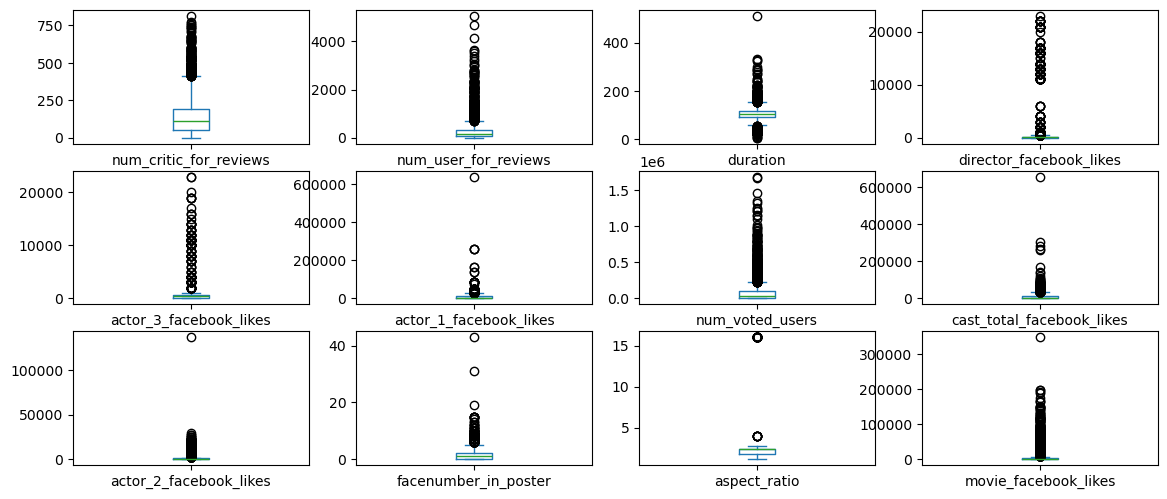

In [287]:
#Analizar la distribución de las variables numéricas
df_numericos.plot(kind='box',subplots=True, layout=(4,4), sharex=False,sharey=False, figsize=(14,8))
plt.show()

#Se observa que en todos los casos se presentan valores atípicos. Por lo tanto, para imputar, se debe de considerar la media

In [288]:
for i in df_numericos.columns:
  df[i] = df[i].fillna(df[i].median())

df_encoders.isnull().sum()

director_name              103
num_critic_for_reviews      49
duration                    15
director_facebook_likes    103
actor_3_facebook_likes      23
                          ... 
CR_grouped_Adult             0
CR_grouped_Family            0
CR_grouped_Other             0
CR_grouped_Teen              0
CR_grouped_Unrated           0
Length: 62, dtype: int64

In [289]:
df_encoders.columns

Index(['director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'actor_1_name', 'movie_title',
       'num_voted_users', 'cast_total_facebook_likes', 'actor_3_name',
       'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link',
       'num_user_for_reviews', 'language', 'title_year',
       'actor_2_facebook_likes', 'aspect_ratio', 'movie_facebook_likes',
       'budget_filled', 'gross_filled', 'imdb_category', 'Action', 'Adventure',
       'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Family', 'Fantasy', 'Film-Noir', 'Game-Show', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'News', 'Reality-TV', 'Romance',
       'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western',
       'continent_Africa', 'continent_Asia', 'continent_Europe',
       'continent_North America', 'continent_Oceania',
       'continent_South America', 'continen

In [290]:
#Eliminar columnas que no se considerarán: title_year, plot_keywords, movie_imdb_link, director_name, actor_1_name, movie_title, actor_2_name, actor_3_name

df = df.drop(columns = ["title_year", "plot_keywords", "movie_imdb_link", "director_name", "actor_1_name", "movie_title", "actor_2_name", "actor_3_name", "language"])
df_encoders = df_encoders.drop(columns = ["title_year", "plot_keywords", "movie_imdb_link", "director_name", "actor_1_name", "movie_title", "actor_2_name", "actor_3_name", "language"])

###**MAPA DE CORRELACIÓN**

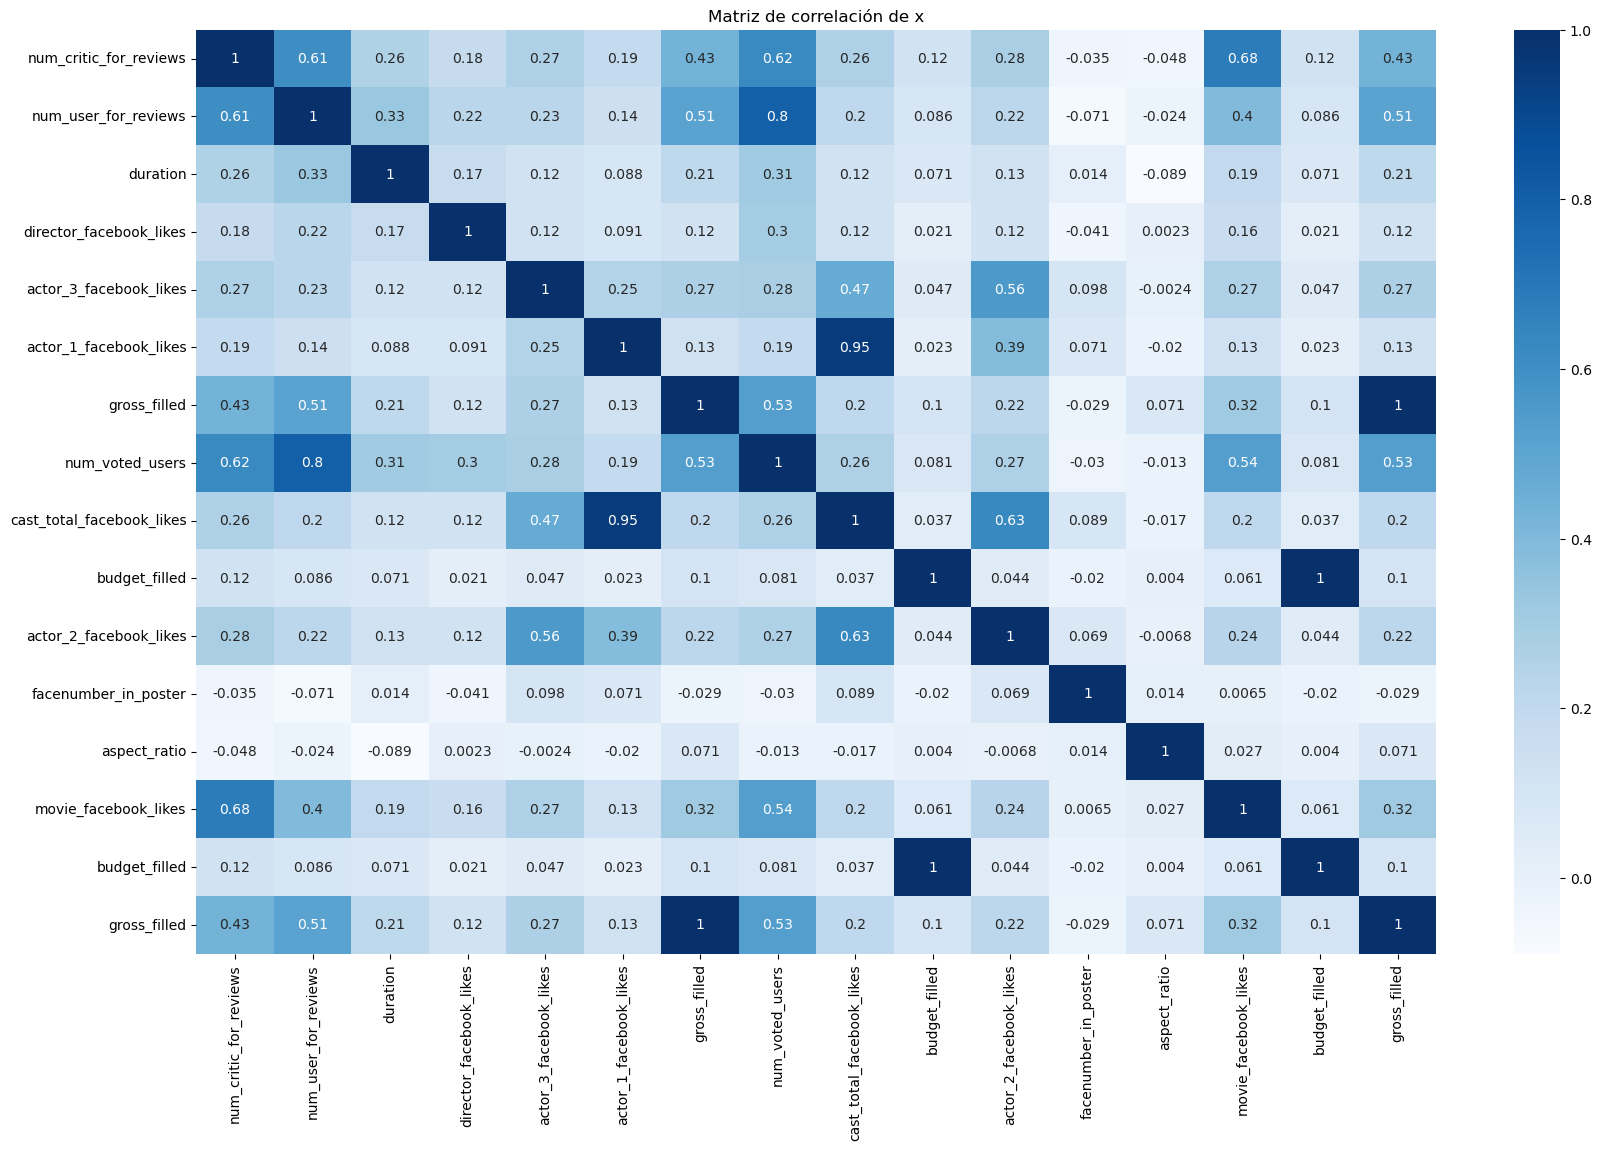

In [304]:
#matriz de correlación de training
plt.figure(figsize=(20, 12))
sns.heatmap(df_encoders[columnas_numericas].corr(), annot = True, cmap='Blues')
plt.title("Matriz de correlación de x")
plt.savefig("Matriz de correlación de x.png", dpi=300, bbox_inches='tight')
plt.show()

###**FAMD**

In [292]:
df.isnull().sum()

num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_1_facebook_likes       0
num_voted_users              0
cast_total_facebook_likes    0
facenumber_in_poster         0
num_user_for_reviews         0
actor_2_facebook_likes       0
aspect_ratio                 0
movie_facebook_likes         0
budget_filled                0
gross_filled                 0
imdb_category                0
CR_grouped                   0
Action                       0
Adventure                    0
Animation                    0
Biography                    0
Comedy                       0
Crime                        0
Documentary                  0
Drama                        0
Family                       0
Fantasy                      0
Film-Noir                    0
Game-Show                    0
History                      0
Horror                       0
Music                        0
Musical                      0
Mystery 

In [293]:
famd = prince.FAMD(n_components=10, random_state=42)

famd_fit = famd.fit(df.drop(columns=["imdb_category"]))
X_famd = famd_fit.transform(df.drop(columns=["imdb_category"]))

In [294]:
X_famd

component,0,1,2,3,4,5,6,7,8,9
0,7.07134,-11.42361,-0.66437,5.02297,-8.23839,6.60169,-3.73755,0.87128,1.40589,-3.30443
1,5.80648,-7.25009,-0.57975,3.42411,-6.02970,4.20424,-1.38654,-0.11206,0.73157,-2.60093
2,-0.17641,-8.57500,-2.02571,5.65955,-4.55578,3.72328,0.48658,-1.80261,-0.02987,-3.92475
3,-2.26328,-7.99301,-0.54653,2.10466,-6.27957,3.43195,0.74283,1.83878,0.41178,-1.35282
4,0.01388,2.65262,2.06968,0.58085,12.92008,14.87593,3.72264,2.95921,-6.24548,-2.00261
...,...,...,...,...,...,...,...,...,...,...
4993,-0.81627,5.06671,2.16656,-3.10095,3.86183,3.61495,1.30178,-3.36763,-2.27477,0.65327
4994,-8.17816,-5.39717,-0.36619,-0.86157,0.99096,-4.86020,3.26274,0.09222,0.56058,-3.56591
4995,-5.59448,-2.46236,1.89215,-1.40179,9.20807,1.48854,-5.21534,-1.57166,-1.42620,0.19297
4996,-0.49102,6.55322,2.23520,-4.92398,-5.82557,2.09023,-0.54561,-2.76288,2.30291,0.12742


In [295]:
famd_fit.column_coordinates_

component,0,1,2,3,4,5,6,7,8,9
variable,,,,,,,,,,
num_critic_for_reviews,0.00047,0.06866,0.00396,0.01106,0.04270,0.00319,0.01397,0.00730,0.00436,0.00175
duration,0.03072,0.00565,0.04072,0.08568,0.04510,0.00183,0.00412,0.00031,0.00251,0.00369
director_facebook_likes,0.00175,0.00044,0.00170,0.00272,0.00362,0.00147,0.00008,0.00270,0.00029,0.00045
actor_3_facebook_likes,0.00398,0.00505,0.00025,0.00094,0.02276,0.00004,0.00032,0.00083,0.00216,0.00005
actor_1_facebook_likes,0.00015,0.00493,0.00077,0.00034,0.01785,0.00147,0.00069,0.00175,0.00024,0.00000
num_voted_users,0.00129,0.04496,0.00364,0.01261,0.04955,0.00054,0.00029,0.00247,0.00206,0.00105
cast_total_facebook_likes,0.00004,0.00776,0.00105,0.00066,0.03017,0.00142,0.00059,0.00260,0.00077,0.00000
facenumber_in_poster,0.00004,0.01201,0.00123,0.01547,0.01957,0.00261,0.00641,0.00191,0.00029,0.00006
num_user_for_reviews,0.00014,0.06523,0.00265,0.01516,0.04797,0.00010,0.01418,0.00170,0.00518,0.00365


In [296]:
eig = np.array(famd_fit.eigenvalues_)

var = eig / eig.sum()

cum = np.cumsum(var)

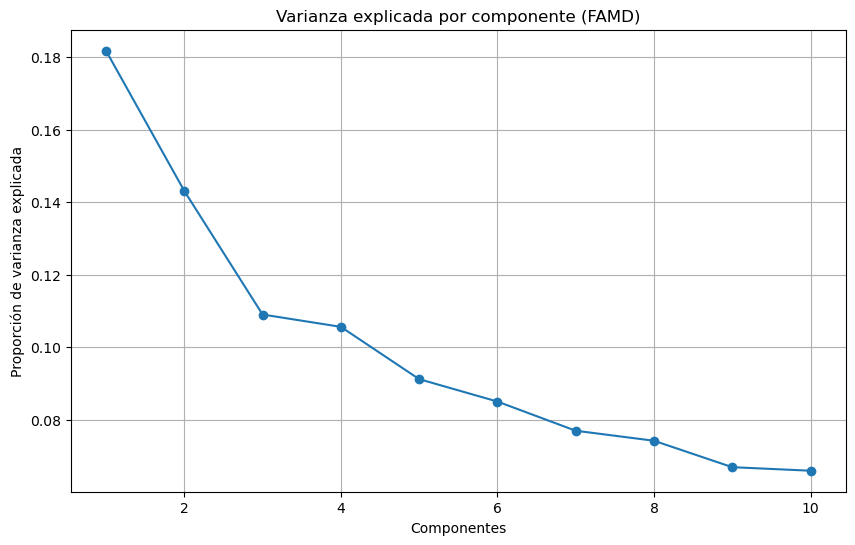

In [302]:
plt.figure(figsize=(10,6))
plt.plot(range(1, len(var)+1), var, marker='o')
plt.title("Varianza explicada por componente (FAMD)")
plt.xlabel("Componentes")
plt.ylabel("Proporción de varianza explicada")
plt.grid(True)
plt.savefig("Varianza explicada por componente (FAMD).png", dpi=300, bbox_inches='tight')
plt.show()

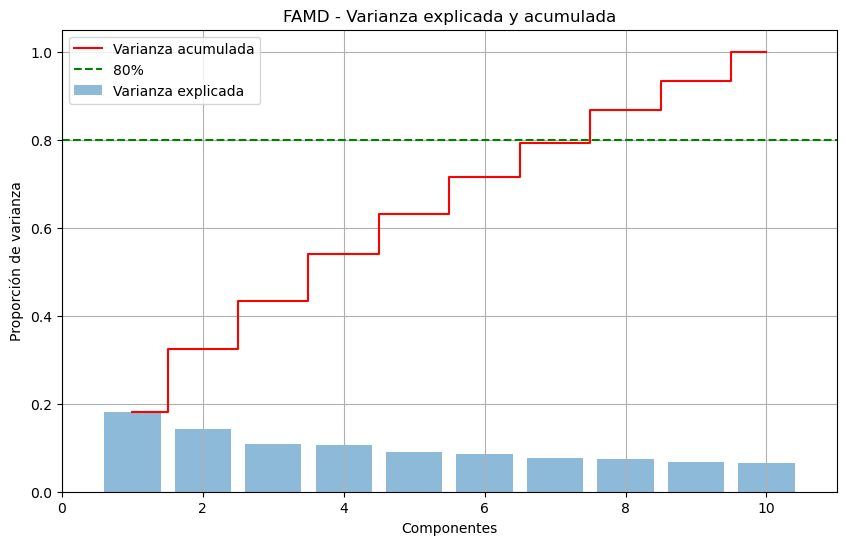

In [303]:
plt.figure(figsize=(10,6))

plt.bar(range(1, len(var)+1), var, alpha=0.5, align='center', label="Varianza explicada")

plt.step(range(1, len(cum)+1), cum, where='mid', color='red', label="Varianza acumulada")

plt.axhline(y=0.80, color='green', linestyle='--', label='80%')

plt.ylabel('Proporción de varianza')
plt.xlabel('Componentes')
plt.title('FAMD - Varianza explicada y acumulada')
plt.xlim(0, len(var)+1)
plt.ylim(0, 1.05)
plt.legend()
plt.grid(True)
plt.savefig("FAMD - Varianza explicada y acumulada.png", dpi=300, bbox_inches='tight')
plt.show()

In [300]:
n_comp_80 = np.argmax(cum >= 0.80) + 1
print("Componentes necesarios para llegar al 80%:", n_comp_80)

Componentes necesarios para llegar al 80%: 8


In [228]:
X_famd = X_famd.iloc[:, :n_comp_80]

In [229]:
X_famd

component,0,1,2,3,4,5,6,7
0,7.07134,-11.42361,-0.66437,5.02297,-8.23839,6.60169,-3.73755,0.87128
1,5.80648,-7.25009,-0.57975,3.42411,-6.02970,4.20424,-1.38654,-0.11206
2,-0.17641,-8.57500,-2.02571,5.65955,-4.55578,3.72328,0.48658,-1.80261
3,-2.26328,-7.99301,-0.54653,2.10466,-6.27957,3.43195,0.74283,1.83878
4,0.01388,2.65262,2.06968,0.58085,12.92008,14.87593,3.72264,2.95921
...,...,...,...,...,...,...,...,...
4993,-0.81627,5.06671,2.16656,-3.10095,3.86183,3.61495,1.30178,-3.36763
4994,-8.17816,-5.39717,-0.36619,-0.86157,0.99096,-4.86020,3.26274,0.09222
4995,-5.59448,-2.46236,1.89215,-1.40179,9.20807,1.48854,-5.21534,-1.57166
4996,-0.49102,6.55322,2.23520,-4.92398,-5.82557,2.09023,-0.54561,-2.76288
